# Data Mining Project

## Question 1 - Data Exploration

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import seaborn as sns


### Load the data

We will load the data to a dataframe and add some additional columns that we will need later.

The additional columns are:
1. 'Tests' - The total number of tests.
2. 'Daily cases' - The number of new cases per day.
3. 'Daily deaths' - The number of new deaths per day.
4. 'Daily positivity rate (%)' - The positivity rate of the tests per day.
5. 'Daily mortality rate (%)' - The mortality rate of the cases per day.
6. 'Positivity rate (%)' - The positivity rate of the tests.
7. 'Mortality rate (%)' - The mortality rate of the cases.

In [62]:
df = pd.read_csv("data/data.csv").fillna(0)

df['Date'] = pd.to_datetime(df['Date'])
df['Tests'] = df.groupby('Entity')['Daily tests'].cumsum().fillna(0)
df['Daily cases'] = df.groupby('Entity')['Cases'].diff().fillna(0)
df['Daily deaths'] = df.groupby('Entity')['Deaths'].diff().fillna(0)
df['Daily positivity rate (%)'] = (df['Daily cases'] / df['Daily tests'] * 100).round(2).fillna(0)
df['Daily mortality rate (%)'] = (df['Daily deaths'] / df['Daily cases'] * 100).round(2).fillna(0)
df['Positivity rate (%)'] = (df['Cases'] / df['Tests'] * 100).round(2).fillna(0)
df['Mortality rate (%)'] = (df['Deaths'] / df['Cases'] * 100).round(2).fillna(0)

In [63]:
df

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,...,Daily tests,Cases,Deaths,Tests,Daily cases,Daily deaths,Daily positivity rate (%),Daily mortality rate (%),Positivity rate (%),Mortality rate (%)
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,...,8.0,0.0,0.0,8.0,0.0,0.0,0.00,0.00,0.00,0.00
1,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,...,5.0,0.0,0.0,13.0,0.0,0.0,0.00,0.00,0.00,0.00
2,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,...,4.0,0.0,0.0,17.0,0.0,0.0,0.00,0.00,0.00,0.00
3,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,...,1.0,0.0,0.0,18.0,0.0,0.0,0.00,0.00,0.00,0.00
4,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,...,8.0,0.0,0.0,26.0,0.0,0.0,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38467,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,...,1804.0,35960.0,1456.0,364666.0,50.0,8.0,2.77,16.00,9.86,4.05
38468,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,...,2965.0,35994.0,1458.0,367631.0,34.0,2.0,1.15,5.88,9.79,4.05
38469,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,...,0.0,36044.0,1463.0,367631.0,50.0,5.0,inf,10.00,9.80,4.06
38470,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,...,0.0,36058.0,1463.0,367631.0,14.0,0.0,inf,0.00,9.81,4.06


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Entity                           38472 non-null  object        
 1   Continent                        38472 non-null  object        
 2   Latitude                         38472 non-null  float64       
 3   Longitude                        38472 non-null  float64       
 4   Average temperature per year     38472 non-null  int64         
 5   Hospital beds per 1000 people    38472 non-null  float64       
 6   Medical doctors per 1000 people  38472 non-null  float64       
 7   GDP/Capita                       38472 non-null  float64       
 8   Population                       38472 non-null  int64         
 9   Median age                       38472 non-null  int64         
 10  Population aged 65 and over (%)  38472 non-null  int64    

### Group the data by country

We will group the data by country, and then we will find the columns that remain constant and the columns that vary per country.


In [65]:
# Group by 'Entity'
dfg = df.groupby('Entity')

# Find the columns that have constant values and the columns that have variable values.
const_cols = set([col for entity, entity_df in dfg for col in entity_df.columns if len(entity_df[col].unique()) == 1])
var_cols = set(df.columns.to_list()) - const_cols

In [66]:
print('Constant columns: ', const_cols)

Constant columns:  {'Hospital beds per 1000 people', 'Population aged 65 and over (%)', 'Latitude', 'Continent', 'Population', 'Entity', 'Median age', 'GDP/Capita', 'Medical doctors per 1000 people', 'Average temperature per year', 'Longitude'}


In [67]:
print('Variable columns: ', var_cols)

Variable columns:  {'Positivity rate (%)', 'Daily positivity rate (%)', 'Daily cases', 'Tests', 'Deaths', 'Mortality rate (%)', 'Daily mortality rate (%)', 'Cases', 'Date', 'Daily deaths', 'Daily tests'}


### Data summary per country

We will create a dataframe that contains the summary of the data per country. The summary will contain all the columns that have constant values and some additional columns that we will calculate.

The additional columns are:
1. 'Days' - The number of days that the country has data for.
2. 'Tests/Million' - The number of tests per million people.
3. 'Cases/Million' - The number of cases per million people.
4. 'Deaths/Million' - The number of deaths per million people.
5. 'Positivity rate (%)' - The positivity rate of the tests.
6. 'Mortality rate (%)' - The mortality rate of the cases.

In [68]:
sum_df = dfg[list(const_cols - {'Entity'})].first()
sum_df['Days'] = dfg['Date'].count()
sum_df[['Tests/Million', 'Cases/Million', 'Deaths/Million']] = dfg[['Tests', 'Cases', 'Deaths']].last().div(sum_df['Population'], axis=0) * 1e6
sum_df[['Positivity rate (%)', 'Mortality rate (%)']] = dfg[['Positivity rate (%)', 'Mortality rate (%)']].last()

sum_df = sum_df.round(2)

sum_df.to_csv('data/data_summary.csv')

In [69]:
sum_df

,Hospital beds per 1000 people,Population aged 65 and over (%),Latitude,Continent,Population,Median age,GDP/Capita,Medical doctors per 1000 people,Average temperature per year,Longitude,Days,Tests/Million,Cases/Million,Deaths/Million,Positivity rate (%),Mortality rate (%)
Entity,,,,,,,,,,,,,,,,
Albania,2.89,14,41.15,Europe,2873457,38,5353.2,1.29,14,20.17,370,150688.87,37295.49,625.03,24.75,1.68
Algeria,1.90,6,28.03,Africa,41318142,29,3974.0,1.83,25,1.66,370,75.03,2737.10,72.20,3648.13,2.64
Argentina,5.00,11,-38.42,South America,44271041,31,9912.3,3.91,14,-63.62,404,137668.66,47601.43,1173.79,34.58,2.47
Armenia,4.20,11,40.07,Europe,2930450,35,4622.7,2.80,11,45.04,365,34007.75,58713.85,1089.25,172.65,1.86
Australia,3.84,16,-25.27,Oceania,24598933,37,55060.3,3.50,22,133.78,400,379550.65,1178.02,36.95,0.31,3.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United States,2.77,16,37.09,North America,325719178,38,65297.5,2.57,11,-95.71,404,1008245.99,87823.10,1575.26,8.71,1.79
Uruguay,2.80,15,-32.52,South America,3456750,35,16190.1,3.74,16,-55.77,353,232735.37,16777.03,175.89,7.21,1.05
Vietnam,2.60,7,14.06,Asia,95540800,32,2715.3,0.82,25,108.28,403,3492.65,25.62,0.37,0.73,1.43


In [70]:
sum_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, Albania to Zimbabwe
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Hospital beds per 1000 people    104 non-null    float64
 1   Population aged 65 and over (%)  104 non-null    int64  
 2   Latitude                         104 non-null    float64
 3   Continent                        104 non-null    object 
 4   Population                       104 non-null    int64  
 5   Median age                       104 non-null    int64  
 6   GDP/Capita                       104 non-null    float64
 7   Medical doctors per 1000 people  104 non-null    float64
 8   Average temperature per year     104 non-null    int64  
 9   Longitude                        104 non-null    float64
 10  Days                             104 non-null    int64  
 11  Tests/Million                    104 non-null    float64
 12  Cases/Million   

In [71]:
sum_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Hospital beds per 1000 people,104.0,3.14,2.550000e+00,0.20,1.40,2.41,4.28,1.305000e+01
Population aged 65 and over (%),104.0,10.54,6.780000e+00,1.00,4.75,8.00,16.00,2.800000e+01
Latitude,104.0,23.39,2.622000e+01,-40.90,8.60,26.92,45.31,6.496000e+01
Population,104.0,47219222.33,1.391388e+08,341284.00,4754490.50,11428352.00,41704346.00,1.339180e+09
Median age,104.0,32.57,8.560000e+00,16.00,27.00,32.00,41.00,4.800000e+01
GDP/Capita,104.0,18581.25,2.220618e+04,411.60,3645.20,8551.95,24279.02,1.147046e+05
Medical doctors per 1000 people,104.0,2.07,1.530000e+00,0.02,0.81,1.86,3.20,7.520000e+00
Average temperature per year,104.0,17.81,8.130000e+00,-2.00,11.00,20.00,25.00,2.900000e+01
Longitude,104.0,19.74,6.088000e+01,-106.35,-4.35,21.42,47.02,1.794100e+02
Days,104.0,369.92,1.884000e+01,334.00,356.75,366.00,375.00,4.250000e+02


#### Drop the edge-cases

From the data we can see that there are some edge-cases that we will drop from the data.

Specifically we will drop the data for 'Algeria' because it has very little data for the tests, and it will skew the data.

In [72]:
sum_df = sum_df.drop('Algeria')

sum_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Hospital beds per 1000 people,103.0,3.15,2.560000e+00,0.20,1.39,2.50,4.35,1.305000e+01
Population aged 65 and over (%),103.0,10.58,6.800000e+00,1.00,4.50,8.00,16.00,2.800000e+01
Latitude,103.0,23.35,2.635000e+01,-40.90,8.58,26.34,45.52,6.496000e+01
Population,103.0,47276514.37,1.398180e+08,341284.00,4715081.00,11372068.00,40568788.00,1.339180e+09
Median age,103.0,32.60,8.590000e+00,16.00,27.00,32.00,41.00,4.800000e+01
GDP/Capita,103.0,18723.07,2.226739e+04,411.60,3631.40,8821.80,24834.75,1.147046e+05
Medical doctors per 1000 people,103.0,2.07,1.540000e+00,0.02,0.80,1.89,3.20,7.520000e+00
Average temperature per year,103.0,17.74,8.140000e+00,-2.00,11.00,20.00,25.00,2.900000e+01
Longitude,103.0,19.91,6.115000e+01,-106.35,-5.26,21.82,47.18,1.794100e+02
Days,103.0,369.92,1.893000e+01,334.00,356.50,366.00,375.00,4.250000e+02


### Plot the data
Now we will plot the data to see if there are any correlations between the columns.

In [73]:
formatter = tkr.FuncFormatter(lambda x, pos: '{:,.1f}B'.format(x / 1e9) if abs(x) >= 1e9
else '{:,.0f}M'.format(x / 1e6) if abs(x) >= 1e6
else '{:,.0f}K'.format(x / 1e3) if abs(x) >= 1e3
else '{:,.0f}'.format(x))

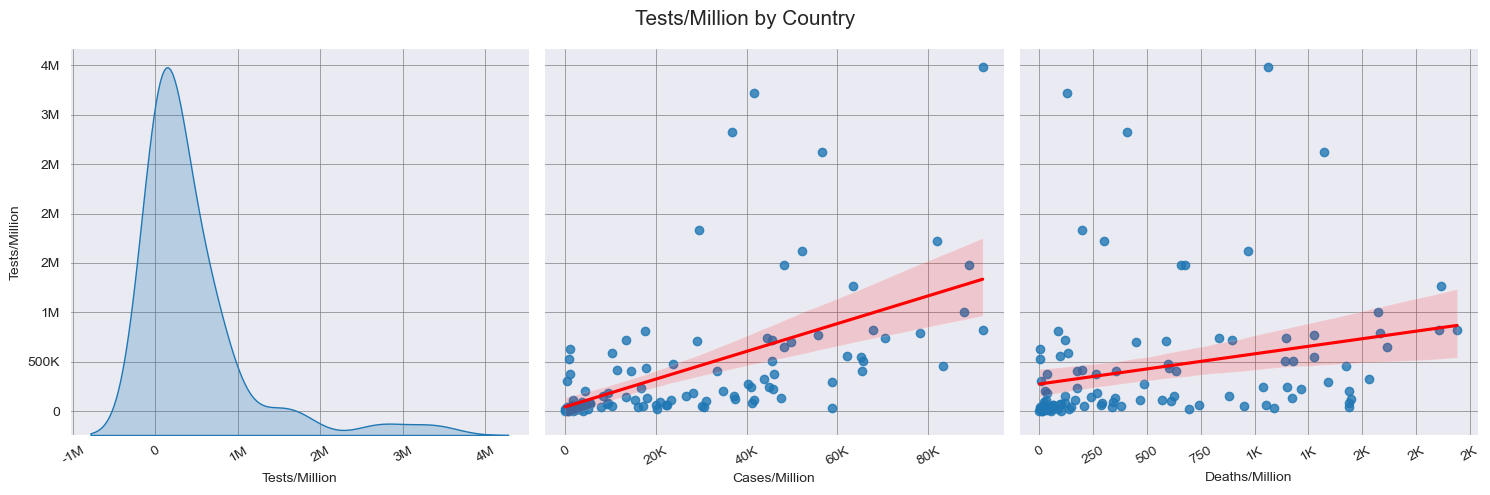

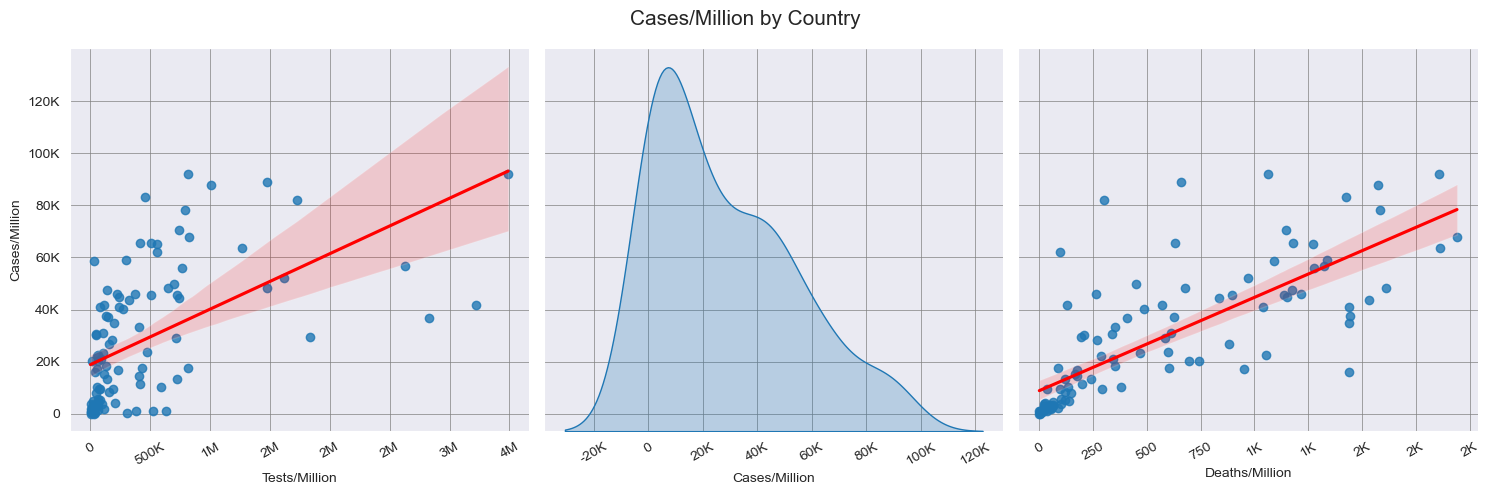

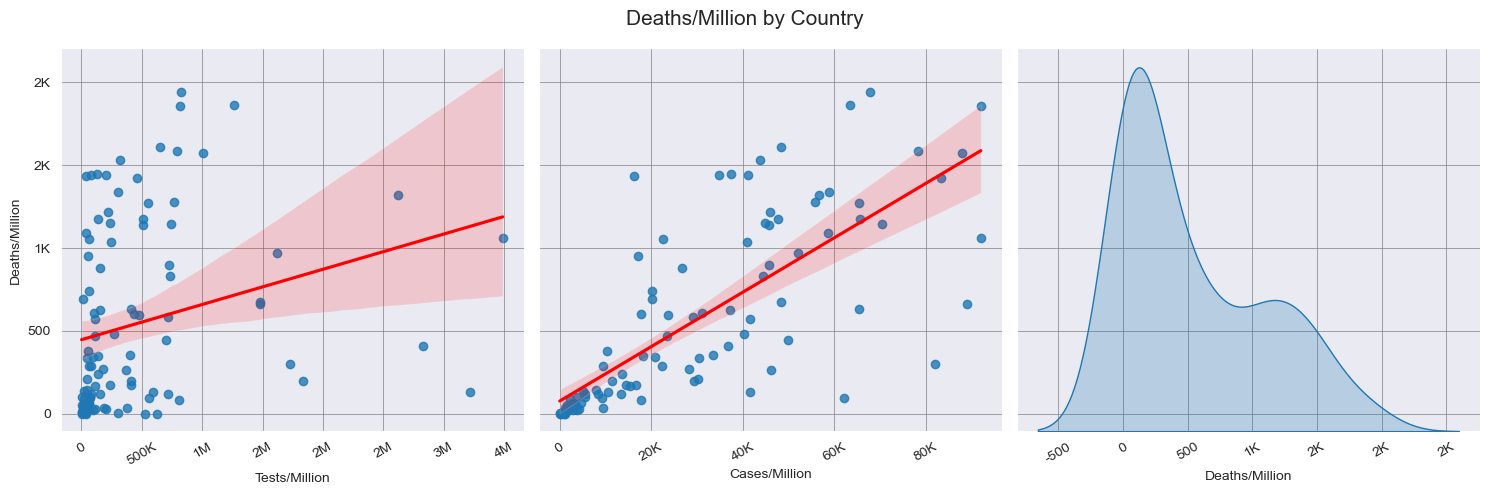

In [74]:
plots = {}
for val in ('Tests/Million', 'Cases/Million', 'Deaths/Million'):

    plots[val] = sns.pairplot(
        data=sum_df,
        y_vars=val,
        x_vars=('Tests/Million', 'Cases/Million', 'Deaths/Million'),
        diag_kind='kde',
        kind='reg',
        plot_kws={'line_kws': {'color': 'red'}},
        height=5
    )

    for axis in plots[val].axes.flat:
        axis.tick_params(axis='x', rotation=30)
        axis.xaxis.set_major_formatter(formatter)
        axis.yaxis.set_major_formatter(formatter)
        axis.grid(color='grey', linestyle='-', linewidth=0.5)

    plt.suptitle(val + ' by Country', fontsize=15)
    plt.subplots_adjust(top=0.9)
    plt.tight_layout()

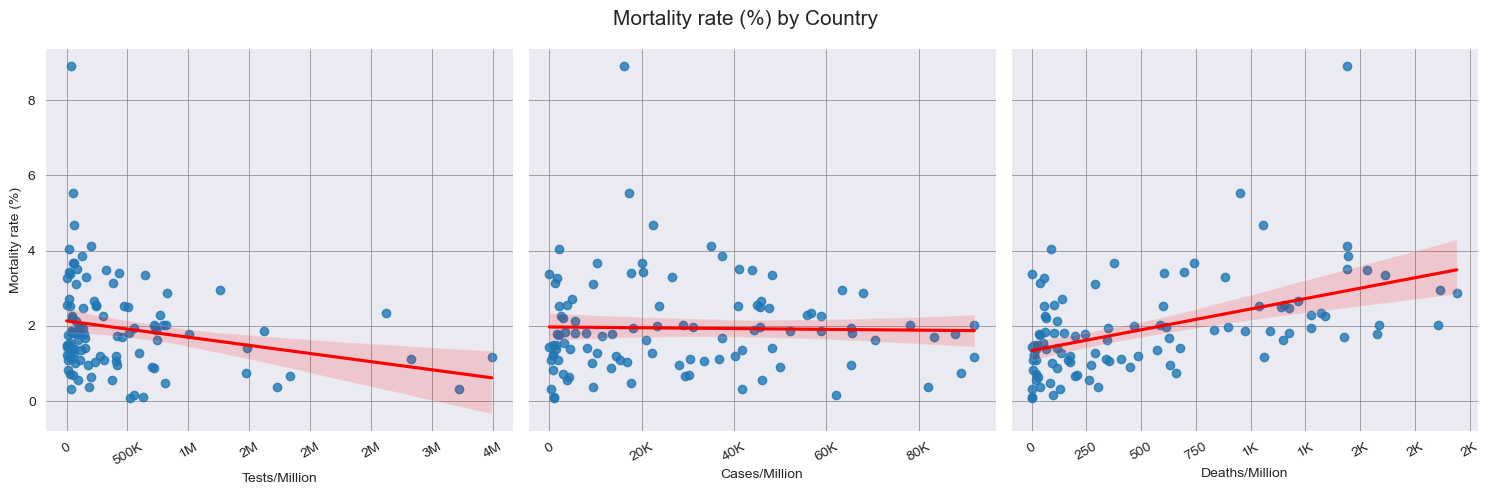

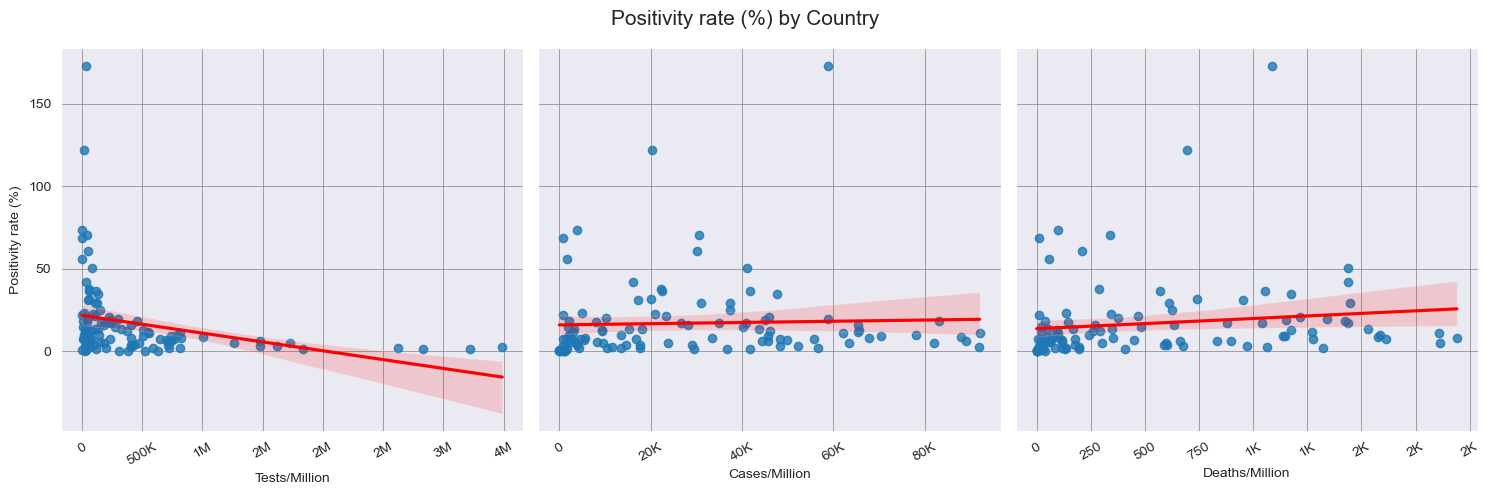

In [75]:
plots = {}
for val in ('Mortality rate (%)', 'Positivity rate (%)'):

    plots[val] = sns.pairplot(
        data=sum_df,
        y_vars=val,
        x_vars=('Tests/Million', 'Cases/Million', 'Deaths/Million'),
        diag_kind='kde',
        kind='reg',
        plot_kws={'line_kws': {'color': 'red'}},
        height=5
    )

    for axis in plots[val].axes.flat:
        axis.tick_params(axis='x', rotation=30)
        axis.xaxis.set_major_formatter(formatter)
        axis.yaxis.set_major_formatter(formatter)
        axis.grid(color='grey', linestyle='-', linewidth=0.5)

    plt.suptitle(val + ' by Country', fontsize=15)
    plt.subplots_adjust(top=0.9)
    plt.tight_layout()

In [ ]:
plot = sns.pairplot(
    data=sum_df,
    # Add the mortality rate to the plot
    y_vars=const_cols - {'Continent', 'Entity'},
    x_vars=['Tests/Million', 'Cases/Million', 'Deaths/Million', 'Positivity rate (%)', 'Mortality rate (%)'],
    kind='reg',
    plot_kws={'line_kws': {'color': 'red'}},
    height=4)

for axis in plot.axes.flat:
    axis.tick_params(axis='x', rotation=30)
    axis.xaxis.set_major_formatter(formatter)
    axis.yaxis.set_major_formatter(formatter)
    axis.grid(color='grey', linestyle='-', linewidth=0.5)

In [ ]:
# Create a figure with 3 subplots.
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Loop through the variables and create box plots.
for i, column in enumerate(('Tests/Million', 'Cases/Million', 'Deaths/Million')):
    sns.boxplot(ax=axes[i], x='Continent', y=column, data=sum_df)
    axes[i].set_title(column + ' by Continent')
    axes[i].set_xlabel('Continent')
    axes[i].set_ylabel(column)
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].grid(axis='y', color='grey', linestyle='-', linewidth=0.5)
    axes[i].yaxis.set_major_formatter(formatter)

# Adjust spacing between subplots.
plt.tight_layout()

# Show the plots.
plt.show()

In [ ]:
# Create a figure with 3 subplots.
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Loop through the variables and create box plots.
for i, column in enumerate(('Positivity rate (%)', 'Mortality rate (%)')):
    sns.boxplot(ax=axes[i], x='Continent', y=column, data=sum_df)
    axes[i].set_title(column + ' by Continent')
    axes[i].set_xlabel('Continent')
    axes[i].set_ylabel(column)
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].grid(axis='y', color='grey', linestyle='-', linewidth=0.5)
    axes[i].yaxis.set_major_formatter(formatter)

# Adjust spacing between subplots.
plt.tight_layout()

# Show the plots.
plt.show()

In [ ]:
# Compute the correlation matrix
corr_matrix = sum_df.corr()

# Create a custom color map
cmap = sns.color_palette('hot', as_cmap=True)

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5)

# Customize the plot
plt.title('Correlation Heatmap', fontsize=14)
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.gcf().set_size_inches(12, 8)
plt.tight_layout()

# Show the plot
plt.show()

## Question 2 - Clustering

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score as sil
from sklearn.preprocessing import StandardScaler
import itertools

In [ ]:
# Set the threshold for correlation with deaths and mortality
threshold = 0.4

# Select the columns with high correlation to deaths
sel_cols = [col for col in corr_matrix.columns if abs(corr_matrix['Deaths/Million'][col]) >= threshold and col != 'Deaths/Million']
# Get the correlation scores for the selected columns
corr_scores = np.abs(corr_matrix.loc['Deaths/Million', sel_cols])

corr_scores

In [ ]:
# Create the feature matrix using the selected columns
X = sum_df[sel_cols].to_numpy()

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Scale the data using the correlation scores
X_scaled = X_scaled * np.array(corr_scores)

# Apply PCA to the scaled data to reduce the number of dimensions.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Create a list of combinations
epsilons = np.linspace(0.01, 1, 100)
min_samples = range(2, 20)
combinations = list(itertools.product(epsilons, min_samples))

In [ ]:
def get_scores_and_labels(combs, matrix):
    scores = []
    all_labels = []
    for i, (e, s) in enumerate(combs):
        dbscan = DBSCAN(eps=e, min_samples=s)
        dbscan.fit(matrix)

        labels = dbscan.labels_
        labels_set = set(dbscan.labels_)
        cluster_num = len(labels_set) - (1 if -1 in labels_set else 0)

        if (cluster_num < 3) or (cluster_num > 50):
            scores.append(-1)
            all_labels.append('bad')
            print(f'Combination {(e, s)} on iteration {i + 1} produced {cluster_num} clusters. Skipping...')
            continue

        scores.append(sil(matrix, labels))
        all_labels.append(labels)
        print(f'Combination {(e, s)} on iteration {i + 1} produced {cluster_num} clusters. Silhouette score: {scores[-1]}')

    best_index = np.argmax(scores)
    best_params = combs[best_index]
    best_score = scores[best_index]
    best_labels = all_labels[best_index]

    return {
        'best_epsilons': best_params[0],
        'best_min_samples': best_params[1],
        'best_score': best_score,
        'best_labels': best_labels
    }

In [ ]:
best_dict = get_scores_and_labels(combinations, X_pca)
best_dict

In [ ]:
sum_df['Cluster'] = best_dict['best_labels']
sum_df['Cluster'].value_counts()

In [ ]:
# Scatter plot of the data colored by cluster
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=sum_df['Cluster'], cmap='plasma')

In [ ]:
# Show the averages per cluster
clusters_df = sum_df.groupby('Cluster').mean()
clusters_df.round(2)

## Question 3 - Prediction


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
greece_df = df[df['Entity'] == 'Greece']
greece_df.reset_index(inplace=True, drop=True)

# drop the columns that have single unique values
greece_df = greece_df.drop([col for col in greece_df if greece_df[col].nunique() == 1], axis=1)



greece_df

In [ ]:
date_to_predict = greece_df['Date'].max() + pd.Timedelta(days=3)
# Select the features (input)
X = np.arange(len(greece_df)).reshape(-1, 1)

In [ ]:
y1 = greece_df["Daily cases"].values

svr1 = SVR(kernel='linear')

svr1.fit(X, y1)

In [ ]:
y2 = greece_df["Daily tests"].values

svr2 = SVR(kernel='linear')

svr2.fit(X, y2)

In [ ]:
predicted_daily_cases = svr1.predict([[len(greece_df) + 3]])[0]
predicted_daily_tests = svr2.predict([[len(greece_df) + 3]])[0]

predicted_daily_tests_ = round(predicted_daily_cases / predicted_daily_tests * 100, 2)
print(f"Predicted daily positivity rate ({date_to_predict}): {predicted_daily_tests_}%")

In [ ]:
# train_cols = [col for col in greece_df.columns if greece_df[col].nunique() > 1]
# train_cols.remove('Daily positivity rate (%)')
# train_cols.remove('Date')
# ## Select the features (input)
# X = greece_df[train_cols].values
#
# # Select the target variable (output)
# y = greece_df["Daily positivity rate (%)"].values
# X[np.isinf(X)] = 1e10
# y[np.isinf(y)] = 1e10
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
#
# # Create an instance of the SVM regression model
# svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
#
# # Fit the model to the training data
# svm_model.fit(X_train, y_train)
#
# # Make predictions on the testing data
# svm_predictions = svm_model.predict(X_test)
#
# # Evaluate the model
# mse = mean_squared_error(y_test, svm_predictions)
# mae = mean_absolute_error(y_test, svm_predictions)
# r2 = r2_score(y_test, svm_predictions)
#
# # Print the evaluation metrics
# print("Mean Squared Error:", mse)
# print("Mean Absolute Error:", mae)
# print("R-squared Score:", r2)
#
# # Predict the positivity rate three days after the last available data
# last_data = greece_df.iloc[-1, :]
# last_features = last_data[train_cols].values
# predicted_positivity_rate = svm_model.predict([last_features])
# print("Predicted daily positivity rate (3 days later):", predicted_positivity_rate)